In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from IPython.display import display
import scipy.io.wavfile as wav
import os
import speechpy as sp
import sys
%matplotlib notebook

In [3]:
import speechpy
import librosa as lb
import re # for regular expression
import statistics
#np.set_printoptions(threshold=sys.maxsize)
import scipy.stats as stats
from Signal_Analysis.features import signal as SA
np.set_printoptions(threshold=1000)

In [4]:
from __future__ import division
from numpy.fft import rfft
from numpy import argmax, mean, diff, log
from matplotlib.mlab import find
from scipy.signal import blackmanharris, fftconvolve
from time import time
import sys

from importlib.machinery import SourceFileLoader
parabolic = SourceFileLoader("STD", r"C:\Users\Barzarin\OneDrive\jupyter\EMODB\parabolic.py").load_module()

def freq_from_autocorr(sig, fs):
    """
    Estimate frequency using autocorrelation
    """
    # Calculate autocorrelation (same thing as convolution, but with
    # one input reversed in time), and throw away the negative lags
    corr = fftconvolve(sig, sig[::-1], mode='full')
    corr = corr[len(corr)//2:]

    # Find the first low point
    d = diff(corr)
    start = find(d > 0)[0]

    # Find the next peak after the low point (other than 0 lag).  This bit is
    # not reliable for long signals, due to the desired peak occurring between
    # samples, and other peaks appearing higher.
    # Should use a weighting function to de-emphasize the peaks at longer lags.
    peak = argmax(corr[start:]) + start
    px, py = parabolic.parabolic(corr, peak)

    return fs / px

In [5]:
path = r"C:\Users\Barzarin\OneDrive\jupyter\EMODB"
count = 0

mfcc_data = []
mfccstd = []
mfccskew = []
mfcckurt = []
mfccmax = []
mfccmin = []

zcrmean = []
zcrstd = []
zcrskew = []
zcrkurt = []
zcrmax = []
zcrmin = []

#f0mean = []
#f0std = []
#f0skew = []
#f0kurt = []
#f0max = []
#f0min = []

rmsmean = []
rmsstd = []
rmsskew = []
rmskurt = []
rmsmax = []
rmsmin = []

hnrmean = []
hnrstd = []
hnrskew = []
hnrkurt = []
hnrmax = []
hnrmin = []


for inputwave in os.listdir(path):
        
    if inputwave.endswith(".wav"):
        
        fs, signal = wav.read(inputwave)
        y, sr = lb.load(inputwave)
        
        
        
        mfcc = speechpy.feature.mfcc(signal, sampling_frequency=fs, frame_length=0.020, frame_stride=0.01,
                                    num_filters=40, fft_length=512, low_frequency=0, high_frequency=None, num_cepstral=12)
        
        
        zcr = lb.feature.zero_crossing_rate(y)
        
        f0 = freq_from_autocorr(signal, fs)
        
        rms = lb.feature.rmse(y=y)
        
        
        HNR = SA.get_HNR(signal, fs, time_step=0, min_pitch=75, 
                                   silence_threshold=0.1, periods_per_window=4.5)
        
        
        
        
        
        
        
################################################################################################
        
        
        print(inputwave)
        
        mfcc_data.append(mfcc.mean(axis=0))
        mfccstd.append(np.std(mfcc, axis=0))
        mfccskew.append(stats.skew(mfcc, axis=0))
        mfcckurt.append(stats.kurtosis(mfcc, axis=0))
        mfccmax.append(np.max(mfcc, axis=0))
        mfccmin.append(np.min(mfcc, axis=0))
        
        
        
        zcrmean.append(zcr.mean(axis=1))
        zcrstd.append(np.std(zcr, axis=1))
        zcrskew.append(stats.skew(zcr, axis=1))
        zcrkurt.append(stats.kurtosis(zcr, axis=1))
        zcrmax.append(np.max(zcr, axis=1))
        zcrmin.append(np.min(zcr, axis=1))
        
        
        #f0mean.append(f0.mean(axis=0))
        #f0std.append(f0.std(axis=0))
        #f0skew.append(stats.skew(f0, axis=0))
        #f0kurt.append(stats.kurtosis(f0, axis=0))
        #f0max.append(np.max(f0, axis=0))
        #f0min.append(np.min(f0, axis=0))
        
        
        rmsmean.append(rms.mean(axis=1))
        rmsstd.append(np.std(rms, axis=1))
        rmsskew.append(stats.skew(rms, axis=1))
        rmskurt.append(stats.kurtosis(rms, axis=1))
        rmsmax.append(np.max(rms, axis=1))
        rmsmin.append(np.min(rms, axis=1))
        
        hnrmean.append(HNR.mean(axis=0))
        hnrstd.append(HNR.std(axis=0))
        hnrskew.append(stats.skew(HNR, axis=0))
        hnrkurt.append(stats.kurtosis(HNR, axis=0))
        hnrmax.append(np.max(HNR, axis=0))
        hnrmin.append(np.min(HNR, axis=0))

        
        
        
        count = count+1
            
        
print(count)

C:\Users\Barzarin\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning: The find function was deprecated in version 2.2.


03a01Fa.wav
03a01Nc.wav
03a01Wa.wav
03a02Fc.wav
03a02Nc.wav
03a02Ta.wav
03a02Wb.wav
03a02Wc.wav
03a04Ad.wav
03a04Fd.wav
03a04Lc.wav
03a04Nc.wav
03a04Ta.wav
03a04Wc.wav
03a05Aa.wav
03a05Fc.wav
03a05Nd.wav
03a05Tc.wav
03a05Wa.wav
03a05Wb.wav
03a07Fa.wav
03a07Fb.wav
03a07La.wav
03a07Nc.wav
03a07Wc.wav
03b01Fa.wav
03b01Lb.wav
03b01Nb.wav
03b01Td.wav
03b01Wa.wav
03b01Wc.wav
03b02Aa.wav
03b02La.wav
03b02Na.wav
03b02Tb.wav
03b02Wb.wav
03b03Nb.wav
03b03Tc.wav
03b03Wc.wav
03b09La.wav
03b09Nc.wav


C:\Users\Barzarin\Anaconda3\lib\site-packages\Signal_Analysis\features\signal.py:585: RuntimeWarning: divide by zero encountered in true_divide
  r_x = r_a / r_w
C:\Users\Barzarin\Anaconda3\lib\site-packages\peakutils\peak.py:41: RuntimeWarning: invalid value encountered in double_scalars
  thres = thres * (np.max(y) - np.min(y)) + np.min(y)
C:\Users\Barzarin\Anaconda3\lib\site-packages\peakutils\peak.py:84: RuntimeWarning: invalid value encountered in greater
  & (np.greater(y, thres)))[0]


03b09Tc.wav
03b09Wa.wav
03b10Ab.wav
03b10Ec.wav
03b10Na.wav
03b10Nc.wav
03b10Wb.wav
03b10Wc.wav
08a01Ab.wav
08a01Fd.wav
08a01Lc.wav
08a01Na.wav
08a01Wa.wav
08a01Wc.wav
08a02Ab.wav
08a02Ac.wav
08a02Fe.wav
08a02La.wav
08a02Na.wav
08a02Tb.wav
08a02Wc.wav
08a04Ff.wav
08a04La.wav
08a04Nc.wav
08a04Tb.wav
08a04Wc.wav
08a05Fe.wav
08a05Lc.wav
08a05Nb.wav
08a05Ta.wav
08a05Wa.wav
08a07Fd.wav
08a07La.wav
08a07Na.wav
08a07Ta.wav
08a07Tb.wav
08a07Wc.wav
08b01Aa.wav
08b01Fd.wav
08b01Fe.wav
08b01Lb.wav
08b01Na.wav
08b01Wa.wav
08b02Ff.wav
08b02La.wav
08b02Nb.wav
08b02Tc.wav
08b02Wd.wav
08b03Fe.wav
08b03Lc.wav
08b03Nb.wav
08b03Tc.wav
08b03Wd.wav
08b09Ab.wav
08b09Fd.wav
08b09Lc.wav
08b09Nb.wav
08b09Tb.wav
08b09Wa.wav
08b09Wc.wav
08b10Aa.wav


C:\Users\Barzarin\Anaconda3\lib\site-packages\Signal_Analysis\features\signal.py:585: RuntimeWarning: invalid value encountered in true_divide
  r_x = r_a / r_w
C:\Users\Barzarin\Anaconda3\lib\site-packages\peakutils\peak.py:84: RuntimeWarning: invalid value encountered in less
  & (np.greater(y, thres)))[0]


08b10Fd.wav
08b10La.wav
08b10Nc.wav
08b10Tc.wav
08b10Wa.wav
09a01Ea.wav
09a01Fa.wav
09a01Nb.wav
09a01Wb.wav
09a02Ea.wav
09a02Eb.wav
09a02La.wav
09a02Wb.wav
09a04Fd.wav
09a04La.wav
09a04Nb.wav
09a04Wa.wav
09a05Ed.wav
09a05Lc.wav
09a05Nb.wav
09a05Tb.wav
09a05Wb.wav
09a05Wc.wav
09a07Eb.wav
09a07Na.wav
09a07Ta.wav
09a07Wb.wav
09a07Wd.wav
09b01Ea.wav
09b01Na.wav
09b01Wb.wav
09b02Na.wav
09b02Tb.wav
09b02Wc.wav
09b02Wd.wav
09b03Ed.wav
09b03Fa.wav
09b03Fd.wav
09b03Lb.wav
09b03Nb.wav
09b03Ta.wav
09b03Wb.wav
09b09Ea.wav
09b09Nd.wav
09b09Wa.wav
09b10Aa.wav
09b10Nd.wav
09b10Wa.wav
10a01Ac.wav
10a01Nb.wav
10a01Wa.wav
10a02Ab.wav
10a02Fa.wav
10a02Lb.wav
10a02Na.wav
10a02Wa.wav
10a04Fd.wav
10a04Nb.wav
10a04Wa.wav
10a04Wb.wav
10a05Aa.wav
10a05Ld.wav
10a05Tb.wav
10a05Wb.wav
10a07Aa.wav
10a07Ad.wav
10a07La.wav
10a07Ta.wav
10a07Wb.wav
10b01Aa.wav
10b01Ea.wav
10b01Fa.wav
10b01Lb.wav
10b02Aa.wav
10b02La.wav
10b02Na.wav
10b02Wb.wav
10b03La.wav
10b03Tb.wav
10b03Wb.wav
10b09Ad.wav
10b09Lb.wav
10b09Wb.wav
10b1

C:\Users\Barzarin\Anaconda3\lib\site-packages\scipy\io\wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


14a07Aa.wav
14a07Eb.wav
14a07Fd.wav
14a07Lc.wav
14a07Ld.wav
14a07Na.wav
14a07Tc.wav
14a07Wc.wav
14b01Ac.wav
14b01Eb.wav
14b01Fa.wav
14b01Fc.wav
14b01Na.wav
14b01Wc.wav
14b02Aa.wav
14b02Fb.wav
14b02Na.wav
14b02Tc.wav
14b02Wb.wav
14b02Wd.wav
14b03Ad.wav
14b03Ed.wav
14b03Lb.wav
14b03Ta.wav
14b03Wb.wav
14b09Ac.wav
14b09Ea.wav
14b09Fc.wav
14b09Lb.wav
14b09Td.wav
14b09Wa.wav
14b09Wc.wav
14b10Ad.wav
14b10Eb.wav
14b10Lb.wav
14b10Nb.wav
14b10Tc.wav


C:\Users\Barzarin\Anaconda3\lib\site-packages\numpy\lib\function_base.py:1946: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


14b10Wc.wav
15a01Ea.wav
15a01Fb.wav
15a01La.wav
15a01Nb.wav
15a01Wa.wav
15a02Ac.wav
15a02Ea.wav
15a02La.wav
15a02Na.wav
15a02Ta.wav
15a02Wb.wav
15a02Wd.wav
15a04Ab.wav
15a04Ac.wav
15a04Fd.wav
15a04Nc.wav
15a04Wa.wav
15a04Wb.wav
15a05Eb.wav
15a05Fb.wav
15a05Lb.wav
15a05Na.wav
15a05Wa.wav
15a07Ac.wav
15a07Eb.wav
15a07Fa.wav
15a07Fb.wav
15a07Ld.wav
15a07Nc.wav
15b01Ec.wav
15b01Lb.wav
15b01Na.wav
15b01Wc.wav
15b02Aa.wav
15b02Lb.wav
15b02Nd.wav
15b02Tc.wav
15b02Wa.wav
15b02Wc.wav
15b03Aa.wav
15b03Lc.wav
15b03Nb.wav
15b03Tc.wav
15b03Wa.wav
15b03Wb.wav
15b09Ac.wav
15b09Fa.wav
15b09La.wav
15b09Nb.wav
15b09Ta.wav
15b09Wb.wav
15b10Ac.wav
15b10Lc.wav
15b10Nb.wav
15b10Nc.wav
15b10Wa.wav
16a01Ec.wav
16a01Fc.wav
16a01Lb.wav
16a01Nc.wav
16a01Tb.wav
16a01Wb.wav
16a02Ea.wav
16a02Ec.wav
16a02Lb.wav
16a02Nb.wav
16a02Tc.wav
16a02Wb.wav
16a04Ab.wav
16a04Ea.wav
16a04Fa.wav
16a04La.wav
16a04Lc.wav
16a04Nc.wav
16a04Tc.wav
16a04Wb.wav
16a04Wc.wav
16a05Ab.wav
16a05Ea.wav
16a05Fc.wav
16a05La.wav
16a05Tb.wav
16a0

In [6]:
print(f0)

372.9589561895755


In [7]:
len(Tchrmean)

NameError: name 'Tchrmean' is not defined

In [8]:
mfcc_array = np.asarray(mfcc_data)
mfccstd_array = np.asarray(mfccstd)
mfccskew_array = np.asarray(mfccskew)
mfcckurt_array = np.asarray(mfcckurt)
mfccmax_array = np.asarray(mfccmax)
mfccmin_array = np.asarray(mfccmin)

zcrmean_array = np.asarray(zcrmean)
zcrstd_array = np.asarray(zcrstd)
zcrskew_array = np.asarray(zcrskew)
zcrkurt_array = np.asarray(zcrkurt)
zcrmax_array = np.asarray(zcrmax)
zcrmin_array = np.asarray(zcrmin)


rmsmean_array = np.asarray(rmsmean)
rmsstd_array = np.asarray(rmsstd)
rmsskew_array = np.asarray(rmsskew)
rmskurt_array = np.asarray(rmskurt)
rmsmax_array = np.asarray(rmsmax)
rmsmin_array = np.asarray(rmsmin)

hnrmean_array = np.asarray(hnrmean)
hnrstd_array = np.asarray(hnrstd)
hnrskew_array = np.asarray(hnrskew)
hnrkurt_array = np.asarray(hnrkurt)
hnrmax_array = np.asarray(hnrmax)
hnrmin_array = np.asarray(hnrmin)

In [9]:
print(hnrmean_array.shape)

(535,)


In [10]:
hnrmean_rearray=np.reshape(hnrmean_array, (-1,1))
hnrstd_rearray=np.reshape(hnrstd_array, (-1,1))
hnrskew_rearray=np.reshape(hnrskew_array, (-1,1))
hnrkurt_rearray=np.reshape(hnrkurt_array, (-1,1))
hnrmax_rearray=np.reshape(hnrmax_array, (-1,1))
hnrmin_rearray=np.reshape(hnrmin_array, (-1,1))




#mfcc_cmvn_true_array=np.reshape(mfcc_cmvn_array, (535,1))

#mfccstddev_true_array=np.reshape(mfccstddev_array, (535,1))

In [11]:
print(mfcc_array.shape)
print(mfccstd_array.shape)
print(mfccskew_array.shape)
print(mfcckurt_array.shape)
print(mfccmax_array.shape)
print(mfccmin_array.shape)

print(zcrmean_array.shape)
print(zcrstd_array.shape)
print(zcrskew_array.shape)
print(zcrkurt_array.shape)
print(zcrmax_array.shape)
print(zcrmin_array.shape)


print(rmsmean_array.shape)
print(rmsstd_array.shape)
print(rmsskew_array.shape)
print(rmskurt_array.shape)
print(rmsmax_array.shape)
print(rmsmin_array.shape)

print(hnrmean_rearray.shape)
print(hnrstd_rearray.shape)
print(hnrskew_rearray.shape)
print(hnrkurt_rearray.shape)
print(hnrmax_rearray.shape)
print(hnrmin_rearray.shape)

(535, 12)
(535, 12)
(535, 12)
(535, 12)
(535, 12)
(535, 12)
(535, 1)
(535, 1)
(535, 1)
(535, 1)
(535, 1)
(535, 1)
(535, 1)
(535, 1)
(535, 1)
(535, 1)
(535, 1)
(535, 1)
(535, 1)
(535, 1)
(535, 1)
(535, 1)
(535, 1)
(535, 1)


In [12]:
print(Tchrmean_array[0,0])

NameError: name 'Tchrmean_array' is not defined

In [13]:
#zcrmean_rearray=np.reshape(zcrmean, (535,1))
#zcrstd_rearray=np.reshape(zcrstd, (535,1))
#zcrskew_rearray=np.reshape(zcrskew, (535,1))
#zcrkurt_rearray=np.reshape(zcrkurt, (535,1))
#zcrmax_rearray=np.reshape(zcrmax, (535,1))
#zcrmin_rearray=np.reshape(zcrmin, (535,1))




#mfcc_cmvn_true_array=np.reshape(mfcc_cmvn_array, (535,1))

#mfccstddev_true_array=np.reshape(mfccstddev_array, (535,1))

In [14]:
#print(mfccstddev_true_array)

In [15]:
#print(mfcc_cmvn_true_array)

In [16]:
#print(mfcc_array[0,:,0])

In [17]:
#mfcc_true_array=np.reshape(mfcc_array, (535,1))

#mfcc_cmvn_true_array=np.reshape(mfcc_cmvn_array, (535,1))

In [18]:
finaldata = np.concatenate((mfcc_array, mfccstd_array,
                            mfccskew_array, mfcckurt_array,
                            mfccmax_array, mfccmin_array,
                            zcrmean_array, zcrstd_array,
                            zcrskew_array, zcrkurt_array,
                            zcrmax_array, zcrmin_array,
                            rmsmean_array, rmsstd_array,
                            rmsskew_array, rmskurt_array,
                            rmsmax_array, rmsmin_array,
                            hnrmean_rearray, hnrstd_rearray,
                            hnrskew_rearray, hnrkurt_rearray,
                            hnrmax_rearray, hnrmin_rearray
                           ), axis = 1)
#finaldata2 = np.concatenate((finaldata,mfccstddev_true_array), axis = 1)

In [19]:
#print(finaldata2.shape)

In [20]:
print(finaldata.shape)

(535, 90)


In [21]:
#print(finaldata[7,0].shape)

In [22]:
target=[] #anger(W)=0, boredom(L)=1, disgust(E)=2, anxiety/fear(A)=3, happiness(F)=4, sad(T)=5, neutral(N)=6 
    
for inputwave in os.listdir(path):
    
    pattern = r"((\d+.\d+)W(.\.wav))" 
    if re.search(pattern, inputwave):
        target.append(0)
    else:
        pattern = r"((\d+.\d+)L(.\.wav))"
        if re.search(pattern, inputwave):
            target.append(1)
        else:
            pattern = r"((\d+.\d+)E(.\.wav))"
            if re.search(pattern, inputwave):
                target.append(2)
            else:
                pattern = r"((\d+.\d+)A(.\.wav))"
                if re.search(pattern, inputwave):
                    target.append(3)
                else:
                    pattern = r"((\d+.\d+)F(.\.wav))"
                    if re.search(pattern, inputwave):
                        target.append(4)
                    else:
                        pattern = r"((\d+.\d+)T(.\.wav))"
                        if re.search(pattern, inputwave):
                            target.append(5)
                        else:
                            pattern = r"((\d+.\d+)N(.\.wav))"
                            if re.search(pattern, inputwave):
                                target.append(6)
        
print(target)    

[4, 6, 0, 4, 6, 5, 0, 0, 3, 4, 1, 6, 5, 0, 3, 4, 6, 5, 0, 0, 4, 4, 1, 6, 0, 4, 1, 6, 5, 0, 0, 3, 1, 6, 5, 0, 6, 5, 0, 1, 6, 5, 0, 3, 2, 6, 6, 0, 0, 3, 4, 1, 6, 0, 0, 3, 3, 4, 1, 6, 5, 0, 4, 1, 6, 5, 0, 4, 1, 6, 5, 0, 4, 1, 6, 5, 5, 0, 3, 4, 4, 1, 6, 0, 4, 1, 6, 5, 0, 4, 1, 6, 5, 0, 3, 4, 1, 6, 5, 0, 0, 3, 4, 1, 6, 5, 0, 2, 4, 6, 0, 2, 2, 1, 0, 4, 1, 6, 0, 2, 1, 6, 5, 0, 0, 2, 6, 5, 0, 0, 2, 6, 0, 6, 5, 0, 0, 2, 4, 4, 1, 6, 5, 0, 2, 6, 0, 3, 6, 0, 3, 6, 0, 3, 4, 1, 6, 0, 4, 6, 0, 0, 3, 1, 5, 0, 3, 3, 1, 5, 0, 3, 2, 4, 1, 3, 1, 6, 0, 1, 5, 0, 3, 1, 0, 4, 1, 0, 3, 3, 1, 6, 0, 2, 4, 1, 6, 5, 0, 3, 4, 6, 0, 3, 4, 4, 1, 6, 5, 0, 3, 1, 5, 0, 3, 2, 4, 1, 6, 0, 3, 4, 6, 5, 0, 4, 1, 6, 5, 0, 0, 3, 4, 1, 6, 5, 0, 3, 3, 1, 6, 5, 0, 4, 1, 6, 0, 3, 2, 6, 0, 0, 0, 3, 1, 6, 5, 0, 3, 1, 0, 5, 0, 3, 2, 4, 6, 0, 0, 0, 1, 5, 3, 5, 0, 3, 1, 0, 3, 2, 2, 4, 1, 6, 0, 3, 2, 4, 1, 6, 5, 0, 3, 4, 1, 5, 0, 3, 2, 1, 6, 5, 0, 0, 4, 1, 6, 5, 0, 3, 2, 4, 1, 6, 0, 4, 1, 6, 0, 3, 2, 4, 1, 6, 5, 0, 3, 2, 4, 4, 1, 6, 0, 

In [23]:
target_array = np.asarray(target)
print(target_array.shape)
print(target_array)

(535,)
[4 6 0 4 6 5 0 0 3 4 1 6 5 0 3 4 6 5 0 0 4 4 1 6 0 4 1 6 5 0 0 3 1 6 5 0 6
 5 0 1 6 5 0 3 2 6 6 0 0 3 4 1 6 0 0 3 3 4 1 6 5 0 4 1 6 5 0 4 1 6 5 0 4 1
 6 5 5 0 3 4 4 1 6 0 4 1 6 5 0 4 1 6 5 0 3 4 1 6 5 0 0 3 4 1 6 5 0 2 4 6 0
 2 2 1 0 4 1 6 0 2 1 6 5 0 0 2 6 5 0 0 2 6 0 6 5 0 0 2 4 4 1 6 5 0 2 6 0 3
 6 0 3 6 0 3 4 1 6 0 4 6 0 0 3 1 5 0 3 3 1 5 0 3 2 4 1 3 1 6 0 1 5 0 3 1 0
 4 1 0 3 3 1 6 0 2 4 1 6 5 0 3 4 6 0 3 4 4 1 6 5 0 3 1 5 0 3 2 4 1 6 0 3 4
 6 5 0 4 1 6 5 0 0 3 4 1 6 5 0 3 3 1 6 5 0 4 1 6 0 3 2 6 0 0 0 3 1 6 5 0 3
 1 0 5 0 3 2 4 6 0 0 0 1 5 3 5 0 3 1 0 3 2 2 4 1 6 0 3 2 4 1 6 5 0 3 4 1 5
 0 3 2 1 6 5 0 0 4 1 6 5 0 3 2 4 1 6 0 4 1 6 0 3 2 4 1 6 5 0 3 2 4 4 1 6 0
 2 4 1 6 0 0 3 3 2 6 0 0 3 2 4 1 6 5 0 0 3 2 1 5 5 0 0 3 3 4 4 1 6 5 5 0 0
 3 2 4 1 1 6 5 0 3 2 4 4 6 0 3 4 6 5 0 0 3 2 1 5 0 3 2 4 1 5 0 0 3 2 1 6 5
 0 2 4 1 6 0 3 2 1 6 5 0 0 3 3 4 6 0 0 2 4 1 6 0 3 2 4 4 1 6 2 1 6 0 3 1 6
 5 0 0 3 1 6 5 0 0 3 4 1 6 5 0 3 1 6 6 0 2 4 1 6 5 0 2 2 1 6 5 0 3 2 4 1 1
 6 5 0 0 3 2 4 1 5

from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 8), dpi=100, facecolor='w', edgecolor='k')
color = ["red" if c == 0 
         else "grey" if c == 1 
         else "lightgrey" if c==2 
         else "wheat" if c==3 
         else "green" if c==4 
         else  "lightblue" if c==5 
         else "black" for c in target_array]
plt.scatter(mfccstddev_true_array, target, c=color)

from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 8), dpi=100, facecolor='w', edgecolor='k')
color = ["red" if c == 0 
         else "grey" if c == 1 
         else "lightgrey" if c==2 
         else "wheat" if c==3 
         else "green" if c==4 
         else  "lightblue" if c==5 
         else "black" for c in target_array]
plt.scatter(mfcc_cmvn_array, target, c=color)

#anger(W)=0, boredom(L)=1, disgust(E)=2, anxiety/fear(A)=3, happiness(F)=4, sad(T)=5, neutral(N)=6 
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 8), dpi=100, facecolor='w', edgecolor='k')
color = ["red" if c == 0 
         else "grey" if c == 1 
         else "lightgrey" if c==2 
         else "wheat" if c==3 
         else "green" if c==4 
         else  "lightblue" if c==5 
         else "black" for c in target_array]

plt.scatter(mfcc_array, target, c=color)



#anger(W)=0, boredom(L)=1, disgust(E)=2, anxiety/fear(A)=3, happiness(F)=4, sad(T)=5, neutral(N)=6 
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 8), dpi=100, facecolor='w', edgecolor='k')
color = ["red" if c == 0 
         else "grey" if c == 1 
         else "lightgrey" if c==2 
         else "wheat" if c==3 
         else "green" if c==4 
         else  "lightblue" if c==5 
         else "black" for c in target_array]

plt.scatter(mfcc_array,mfccstddev_true_array, c=color)



In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(finaldata, target_array, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(401, 90)
(134, 90)
(134,)
(401,)


In [25]:
X_train[1]

array([ 2.01139043e+01,  8.41848735e+00,  2.90268660e+00,  1.49482544e+00,
       -5.67777341e-01,  3.71817411e-02, -4.52647086e-01,  8.23525457e-01,
       -6.34272912e-02,  6.27945546e-01,  5.83385918e-02, -7.59023453e-02,
        2.70476147e+00,  5.42917937e+00,  3.66356700e+00,  1.60990124e+00,
        2.56946111e+00,  1.15622020e+00,  1.68741556e+00,  1.46052991e+00,
        1.05915247e+00,  1.24743998e+00,  1.06308361e+00,  1.02124527e+00,
       -1.02338298e+00, -1.17996887e+00, -2.24108214e-01,  5.39284840e-02,
       -8.74235813e-01,  4.73298104e-02, -7.19083059e-01,  8.10699443e-01,
        2.76427058e-01,  4.66482150e-01, -3.61207360e-02, -1.82984200e-01,
        1.97065645e-01,  1.23758016e+00,  9.95840627e-01, -2.59529837e-01,
        5.05831309e-01,  8.44153781e-01,  1.82084206e+00,  1.26143993e+00,
        7.60093610e-02, -9.21200539e-03,  9.76438949e-02,  7.21829765e-02,
        2.44315677e+01,  1.97289498e+01,  1.41640477e+01,  6.30305102e+00,
        5.22934694e+00,  

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
clf = KNeighborsClassifier(n_neighbors=7)

clf.fit(X_train, y_train)

clf.score(X_test, y_test)


0.5298507462686567

In [28]:
Accuracy = []

for i in range(401):
    clf = KNeighborsClassifier(n_neighbors=i+1)
    clf.fit(X_train, y_train)
    value = clf.score(X_test, y_test)
    Accuracy.append(value)


In [29]:
#print(Accuracy)

In [30]:
Accuracy.index(max(Accuracy))

8

Text(0,0.5,'Accuracy[%]')

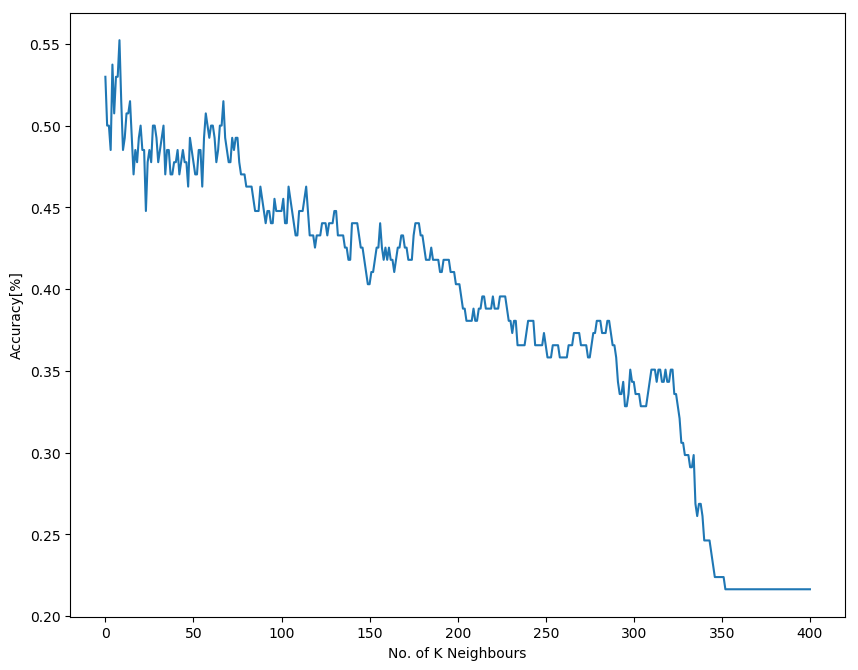

In [31]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 8), dpi=100, facecolor='w', edgecolor='k')
plt.plot(Accuracy)
plt.xlabel("No. of K Neighbours")
plt.ylabel("Accuracy[%]")

In [32]:
y_train.size

401

In [33]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()
features_standardized = scaler.fit_transform(X_train)

In [35]:
features_standardized.shape

(401, 90)

In [36]:
svc = LinearSVC(C=0.1)
model = svc.fit(features_standardized,y_train)
print(svc.score(scaler.fit_transform(X_test), y_test))

0.7089552238805971


In [37]:
svc = LinearSVC(C=100)
model = svc.fit(features_standardized,y_train)
print(svc.score(scaler.fit_transform(X_test), y_test))

0.5970149253731343


C:\Users\Barzarin\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [38]:
#anger(W)=0, boredom(L)=1, disgust(E)=2, anxiety/fear(A)=3, happiness(F)=4, sad(T)=5, neutral(N)=6 

In [39]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [40]:
svc2 = SVC(kernel = "rbf", random_state=0, gamma = 0.011, C=100, probability = True)
model = svc2.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.6119402985074627


In [41]:
print(model.score(X_train, y_train))

1.0


In [53]:
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer

In [54]:
model=SVC()
param_grid=[{
            'svm__kernel':['rbf'],
            'svm__C': [0.001, 0.01, 0.1, 1, 10, 100], 
            'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]
            },
            {
            'svm__kernel':['linear'],
            'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],    
            }]


In [119]:
pipe = Pipeline([("scaler",StandardScaler()), ("svm",model)])
pipe.fit(X_train, y_train)

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, return_train_score=True)
grid.fit(X_train, y_train)

print("Best Cross-Validation Score:{}".format(grid.best_score_ ))
print("Test Score Set:{}".format(grid.score(X_test, y_test)))
print("Best Parameter:{}".format(grid.best_params_))
print("Best Estimator:{}".format(grid.best_estimator_))

Best Cross-Validation Score:0.7057356608478803
Test Score Set:0.7089552238805971
Best Parameter:{'svm__C': 10, 'svm__gamma': 0.001, 'svm__kernel': 'rbf'}
Best Estimator:Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm', SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
  verbose=False))])


C:\Users\Barzarin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [56]:
pipe = Pipeline([("scaler",MinMaxScaler()), ("svm",model)])
pipe.fit(X_train, y_train)

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, return_train_score=True)
grid.fit(X_train, y_train)

print("Best Cross-Validation Score:{}".format(grid.best_score_ ))
print("Test Score Set:{}".format(grid.score(X_test, y_test)))
print("Best Parameter:{}".format(grid.best_params_))
print("Best Estimator:{}".format(grid.best_estimator_))

C:\Users\Barzarin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Best Cross-Validation Score:0.7107231920199502
Test Score Set:0.753731343283582
Best Parameter:{'svm__C': 10, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}
Best Estimator:Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('svm', SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])


C:\Users\Barzarin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [ ]:
pipe = Pipeline([("scaler",RobustScaler()), ("svm",model)])
pipe.fit(X_train, y_train)

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, return_train_score=True)
grid.fit(X_train, y_train)

print("Best Cross-Validation Score:{}".format(grid.best_score_ ))
print("Test Score Set:{}".format(grid.score(X_test, y_test)))
print("Best Parameter:{}".format(grid.best_params_))
print("Best Estimator:{}".format(grid.best_estimator_))

In [ ]:
pipe = Pipeline([("scaler",Normalizer()), ("svm",model)])
pipe.fit(X_train, y_train)

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, return_train_score=True)
grid.fit(X_train, y_train)

print("Best Cross-Validation Score:{}".format(grid.best_score_ ))
print("Test Score Set:{}".format(grid.score(X_test, y_test)))
print("Best Parameter:{}".format(grid.best_params_))
print("Best Estimator:{}".format(grid.best_estimator_))

In [ ]:
pipe = Pipeline([("scaler",StandardScaler()), ("svm",model)])
pipe.fit(X_train, y_train)

grid = GridSearchCV(pipe, param_grid=param_grid, cv=10, return_train_score=True)
grid.fit(X_train, y_train)

print("Best Cross-Validation Score:{}".format(grid.best_score_ ))
print("Test Score Set:{}".format(grid.score(X_test, y_test)))
print("Best Parameter:{}".format(grid.best_params_))
print("Best Estimator:{}".format(grid.best_estimator_))

In [ ]:
pipe = Pipeline([("scaler",MinMaxScaler()), ("svm",model)])
pipe.fit(X_train, y_train)

grid = GridSearchCV(pipe, param_grid=param_grid, cv=10, return_train_score=True)
grid.fit(X_train, y_train)

print("Best Cross-Validation Score:{}".format(grid.best_score_ ))
print("Test Score Set:{}".format(grid.score(X_test, y_test)))
print("Best Parameter:{}".format(grid.best_params_))
print("Best Estimator:{}".format(grid.best_estimator_))

In [ ]:
pipe = Pipeline([("scaler",RobustScaler()), ("svm",model)])
pipe.fit(X_train, y_train)

grid = GridSearchCV(pipe, param_grid=param_grid, cv=10, return_train_score=True)
grid.fit(X_train, y_train)

print("Best Cross-Validation Score:{}".format(grid.best_score_ ))
print("Test Score Set:{}".format(grid.score(X_test, y_test)))
print("Best Parameter:{}".format(grid.best_params_))
print("Best Estimator:{}".format(grid.best_estimator_))

In [ ]:
pipe = Pipeline([("scaler",Normalizer()), ("svm",model)])
pipe.fit(X_train, y_train)

grid = GridSearchCV(pipe, param_grid=param_grid, cv=10, return_train_score=True)
grid.fit(X_train, y_train)

print("Best Cross-Validation Score:{}".format(grid.best_score_ ))
print("Test Score Set:{}".format(grid.score(X_test, y_test)))
print("Best Parameter:{}".format(grid.best_params_))
print("Best Estimator:{}".format(grid.best_estimator_))

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.svm import SVC
import seaborn as sns

In [44]:
#matrix = confusion_matrix(target_test)

iris = datasets.load_iris()
print(iris.target_names)

In [120]:
class_names = ['anger', 'boredom', 'disgust', 'anxiety/fear', 'happiness', 'sad', 'neutral']

In [94]:
#grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, return_train_score=True)

In [121]:
scaler = StandardScaler()
#scaler = MinMaxScaler()
features_standardized = scaler.fit_transform(X_train)

In [135]:
svc = SVC(kernel='rbf', C=10, gamma=0.001, random_state=0)
#svc = LinearSVC(C=1)
model = svc.fit(features_standardized,y_train).predict(scaler.fit_transform(X_test))
print(svc.score(scaler.fit_transform(X_test), y_test))

0.6940298507462687


In [136]:
#{'svm__C': 100, 'svm__gamma': 0.01, 'svm__kernel': 'rbf'}

In [137]:
#y_predicted = grid.fit(X_train, y_train).predict(X_test) gi mati

In [138]:
matrix = confusion_matrix(y_test, model)

In [139]:
dataframe = pd.DataFrame(matrix, index = class_names, columns= class_names)

<IPython.core.display.Javascript object>


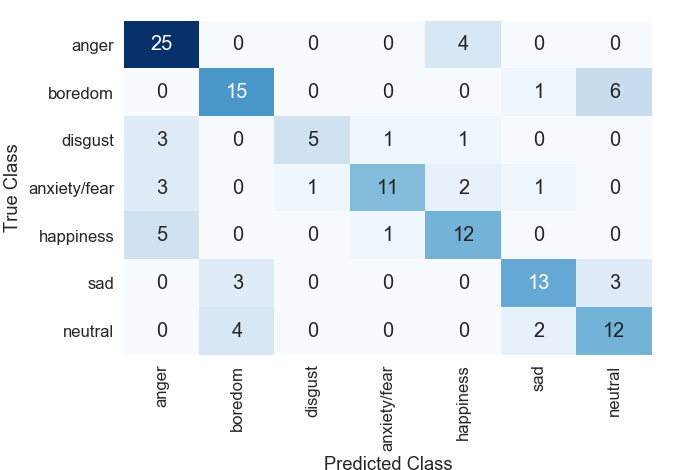

In [140]:
sns.heatmap(dataframe, annot = True, cbar=None, cmap="Blues")
sns.set(font_scale=1.2)
#plt.title("Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [102]:
dataframe['Target'] = target_array
 

ValueError: Length of values does not match length of index

In [103]:
from sklearn.metrics import classification_report

In [141]:
svc2 = SVC(kernel = "rbf", random_state=0, gamma = 0.001, C=10, probability = True)
model = svc2.fit(StandardScaler().fit_transform(X_train), y_train)
#print(model.score(StandardScaler().fit_transform(X_test), y_test))
target_predicted = model.predict(StandardScaler().fit_transform(X_test))
print(classification_report(y_test,
                           target_predicted,
                           target_names=class_names))


              precision    recall  f1-score   support

       anger       0.69      0.86      0.77        29
     boredom       0.68      0.68      0.68        22
     disgust       0.83      0.50      0.62        10
anxiety/fear       0.85      0.61      0.71        18
   happiness       0.63      0.67      0.65        18
         sad       0.76      0.68      0.72        19
     neutral       0.57      0.67      0.62        18

   micro avg       0.69      0.69      0.69       134
   macro avg       0.72      0.67      0.68       134
weighted avg       0.71      0.69      0.69       134



In [ ]:
from sklearn.externals import joblib
joblib.dump(model, "speech_emo_recognitionkaizenscaler.pkl")

In [ ]:
results = pd.DataFrame(grid.cv_results_)
display(results)

In [ ]:
from sklearn.model_selection import learning_curve
%matplotlib notebook

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(svc2,
                                                       StandardScaler().fit_transform(finaldata),
                                                       target_array,
                                                       cv=5,
                                                       scoring='accuracy',
                                                       n_jobs = -1,
                                                       train_sizes=np.linspace(0.01, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, '--', color = "#2f5f84", label ="Training Score")
plt.plot(train_sizes, test_mean, color = "#b74f42", label ="Cross-validation Score")


plt.fill_between(train_sizes, train_mean-train_std,
                train_mean+train_std, color = "#d2e9f2")

plt.fill_between(train_sizes, test_mean-test_std,
                test_mean+test_std, color = "#e5ced9")

#create plot

plt.title("Learning Curve (With Scaler)")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"),
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import validation_curve

In [ ]:
gamma_range = np.arange(0.001, 1.0, 0.001)


train_scores, test_scores = validation_curve(SVC(kernel = "rbf", random_state=0, #gamma = 0.001, 
                                                            C=10, probability = True),
                                                          StandardScaler().fit_transform(finaldata),
                                                          target_array,
                                                          param_name="gamma",
                                                          param_range=gamma_range,
                                                          cv=5,
                                                          scoring='accuracy',
                                                          n_jobs = -1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(gamma_range, train_mean, '--', color = "#2f5f84", label ="Training Score")
plt.plot(gamma_range, test_mean, color = "#b74f42", label ="Cross-validation Score")


plt.fill_between(gamma_range, train_mean-train_std,
                train_mean+train_std, color = "#d2e9f2")

plt.fill_between(gamma_range, test_mean-test_std,
                test_mean+test_std, color = "#e5ced9")

#create plot
plt.title("Validation Curve (Gamma)")
plt.xlabel("Gamma Parameter"), plt.ylabel("Accuracy Score"),
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [ ]:
gamma_range = np.arange(1, 100, 1)


train_scores, test_scores = validation_curve(SVC(kernel = "rbf", random_state=0, #gamma = 0.001, 
                                                            C=10, probability = True),
                                                          StandardScaler().fit_transform(finaldata),
                                                          target_array,
                                                          param_name="gamma",
                                                          param_range=gamma_range,
                                                          cv=5,
                                                          scoring='accuracy',
                                                          n_jobs = -1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(gamma_range, train_mean, '--', color = "#2f5f84", label ="Training Score")
plt.plot(gamma_range, test_mean, color = "#b74f42", label ="Cross-validation Score")


plt.fill_between(gamma_range, train_mean-train_std,
                train_mean+train_std, color = "#d2e9f2")

plt.fill_between(gamma_range, test_mean-test_std,
                test_mean+test_std, color = "#e5ced9")

#create plot
plt.title("Validation Curve (Gamma)")
plt.xlabel("Gamma Parameter"), plt.ylabel("Accuracy Score"),
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [ ]:
c_range = np.arange(0.001, 1, 0.001)


train_scores, test_scores = validation_curve(SVC(kernel = "rbf", random_state=0, gamma = 0.001, probability = True),
                                                          StandardScaler().fit_transform(finaldata),
                                                          target_array,
                                                          param_name="C",
                                                          param_range=c_range,
                                                          cv=5,
                                                          scoring='accuracy',
                                                          n_jobs = -1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(c_range, train_mean, '--', color = "#2f5f84", label ="Training Score")
plt.plot(c_range, test_mean, color = "#b74f42", label ="Cross-validation Score")


plt.fill_between(c_range, train_mean-train_std,
                train_mean+train_std, color = "#d2e9f2")

plt.fill_between(c_range, test_mean-test_std,
                test_mean+test_std, color = "#e5ced9")

#create plot
plt.title("Validation Curve (C)")
plt.xlabel("C Parameter"), plt.ylabel("Accuracy Score"),
plt.legend(loc="best")
plt.tight_layout()

In [ ]:
range1 = np.arange(0.001, 1, 0.001)

In [ ]:
range2 = np.arange(1, 100, 1)

In [ ]:
np.reshape(range, [1,0])

In [ ]:
c_range = np.concatenate((range1, range2), axis=0)

In [ ]:
train_scores, test_scores = validation_curve(SVC(kernel = "rbf", random_state=0, gamma = 0.001, probability = True),
                                                          StandardScaler().fit_transform(finaldata),
                                                          target_array,
                                                          param_name="C",
                                                          param_range=c_range,
                                                          cv=5,
                                                          scoring='accuracy',
                                                          n_jobs = -1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(c_range, train_mean, '--', color = "#2f5f84", label ="Training Score")
plt.plot(c_range, test_mean, color = "#b74f42", label ="Cross-validation Score")


plt.fill_between(c_range, train_mean-train_std,
                train_mean+train_std, color = "#d2e9f2")

plt.fill_between(c_range, test_mean-test_std,
                test_mean+test_std, color = "#e5ced9")

#create plot
plt.title("Validation Curve (C)")
plt.xlabel("C Parameter"), plt.ylabel("Accuracy Score"),
plt.legend(loc="best")
plt.tight_layout()